# PCA on Yale Faces Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from random import sample
import shutil
from zipfile import ZipFile ## Download this library if not available
import warnings
warnings.filterwarnings("ignore") ##Ignore all sort of warnings

**1. Extract the zip file to obtain the folder** 

In [3]:
my_dir = os.getcwd() ## my_dir is my current working folder
zip_folder = os.path.join(my_dir,"yalefaces.zip")
print("Path to the zipped folder is {}".format(zip_folder))
with ZipFile(zip_folder, 'r') as zip: 
    zip.extractall()

Path to the zipped folder is C:\Users\Anup\Desktop\iit\PROJECTS\PCA on Yale Faces Dataset\yalefaces.zip


**2. Display some of the images from the dataset**

['Readme.txt', 'subject01.gif', 'subject01.glasses', 'subject01.glasses.gif', 'subject01.happy', 'subject01.leftlight', 'subject01.noglasses', 'subject01.normal', 'subject01.rightlight', 'subject01.sad', 'subject01.sleepy', 'subject01.surprised', 'subject01.wink', 'subject02.centerlight', 'subject02.glasses', 'subject02.happy', 'subject02.leftlight', 'subject02.noglasses', 'subject02.normal', 'subject02.rightlight', 'subject02.sad', 'subject02.sleepy', 'subject02.surprised', 'subject02.wink', 'subject03.centerlight', 'subject03.glasses', 'subject03.happy', 'subject03.leftlight', 'subject03.noglasses', 'subject03.normal', 'subject03.rightlight', 'subject03.sad', 'subject03.sleepy', 'subject03.surprised', 'subject03.wink', 'subject04.centerlight', 'subject04.glasses', 'subject04.happy', 'subject04.leftlight', 'subject04.noglasses', 'subject04.normal', 'subject04.rightlight', 'subject04.sad', 'subject04.sleepy', 'subject04.surprised', 'subject04.wink', 'subject05.centerlight', 'subject05.

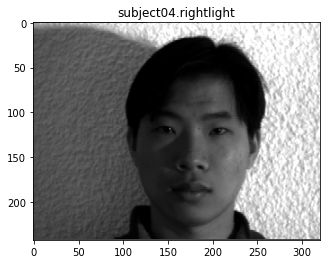

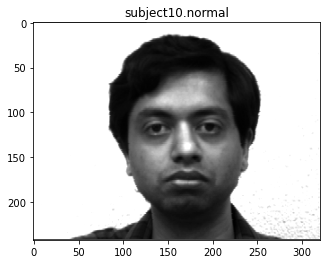

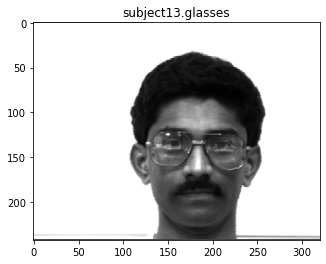

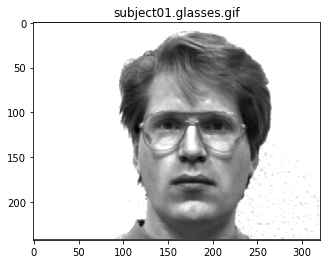

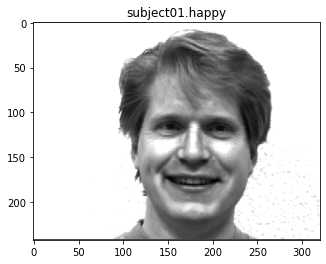

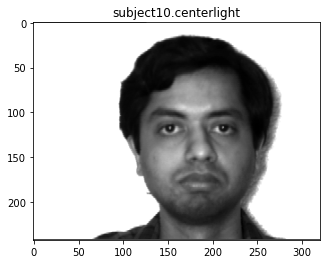

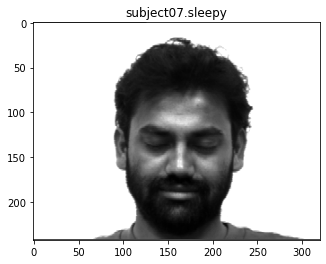

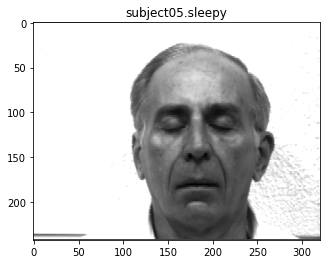

UnidentifiedImageError: cannot identify image file 'C:\\Users\\Anup\\Desktop\\iit\\PROJECTS\\PCA on Yale Faces Dataset\\yalefaces\\Readme.txt'

In [4]:
data_folder = os.path.join(my_dir,"yalefaces")
file_list = os.listdir(data_folder)
print(file_list)
sample_images = sample(file_list,10) ## Sample 10 images from the dataset
for img_name in sample_images:
    image_path = os.path.join(data_folder,img_name)
    image = mpimg.imread(image_path)
    plt.imshow(image,cmap="gray")
    plt.title(img_name)
    plt.show()

**3. Divide the dataset into training and testing sets**

In [5]:
train_folder_path = os.path.join(my_dir,"Faces_Train")
test_folder_path = os.path.join(my_dir,"Faces_Test")

## Delete the folders if they exist already
if os.path.exists(train_folder_path):
    shutil.rmtree(train_folder_path)

if os.path.exists(test_folder_path):
    shutil.rmtree(test_folder_path)

os.mkdir(train_folder_path)  ## Creates a new directory
os.mkdir(test_folder_path) ## Creates a new directory

idx_list = [str(i).zfill(2) for i in range(1,16,1)] ##Creates numbers with leading zeros(i.e. 01 instead of 1, 02 instaed of 2 etc.)
print(idx_list)

file_name_list = [[] for i in range(15)]

for i in range(len(idx_list)):
    for fname in file_list:
        if fname.startswith("subject"+idx_list[i]):
            file_name_list[i].append(os.path.join(data_folder,fname))

print(file_name_list)

for i in range(len(idx_list)):
    ls = file_name_list[i]  ## Finds a list within the 'file_name_list',which contains the paths to images of a particular subject
    
    ## Since a single list contains paths to the images of a particular subject and each subject has 11 images, we will randomly choose an index between 0 and 11
    test_idx = np.random.choice(11)  
    test_file = ls[test_idx]
    shutil.copy(test_file,test_folder_path)
    
    ls.remove(ls[test_idx])
    
    for train_file in ls:
        shutil.copy(train_file,train_folder_path)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']
[['C:\\Users\\Anup\\Desktop\\iit\\PROJECTS\\PCA on Yale Faces Dataset\\yalefaces\\subject01.gif', 'C:\\Users\\Anup\\Desktop\\iit\\PROJECTS\\PCA on Yale Faces Dataset\\yalefaces\\subject01.glasses', 'C:\\Users\\Anup\\Desktop\\iit\\PROJECTS\\PCA on Yale Faces Dataset\\yalefaces\\subject01.glasses.gif', 'C:\\Users\\Anup\\Desktop\\iit\\PROJECTS\\PCA on Yale Faces Dataset\\yalefaces\\subject01.happy', 'C:\\Users\\Anup\\Desktop\\iit\\PROJECTS\\PCA on Yale Faces Dataset\\yalefaces\\subject01.leftlight', 'C:\\Users\\Anup\\Desktop\\iit\\PROJECTS\\PCA on Yale Faces Dataset\\yalefaces\\subject01.noglasses', 'C:\\Users\\Anup\\Desktop\\iit\\PROJECTS\\PCA on Yale Faces Dataset\\yalefaces\\subject01.normal', 'C:\\Users\\Anup\\Desktop\\iit\\PROJECTS\\PCA on Yale Faces Dataset\\yalefaces\\subject01.rightlight', 'C:\\Users\\Anup\\Desktop\\iit\\PROJECTS\\PCA on Yale Faces Dataset\\yalefaces\\subject01.sad', 'C:\\Us

**4. Find eigen-vectors**

In [6]:
train_files_list = os.listdir(train_folder_path)
#print(train_files_list)
train_ls = []
for file in train_files_list:
    img_file = os.path.join(train_folder_path,file)
    arr = mpimg.imread(img_file)
    #print(arr.shape)
    arr = arr.reshape(1,arr.shape[0]*arr.shape[1]) ## Convert to a 1D matrix
    train_ls.append(np.ravel(arr)) ## Before appending, convert the 1D martix to a 1d array using np.ravel 
    train_mat = np.matrix(train_ls)
print(train_mat.shape)
mean_img = np.mean(train_mat,axis=0)
print(mean_img.shape)
cov = np.cov(train_mat)
print(cov)
eig_val,eig_vec = np.linalg.eig(cov)
#print(eig_vec)

(151, 77760)
(1, 77760)
[[7141.06102873 5026.05738009 5175.78102849 ... 5410.27480165
  4469.00713035 5618.29697079]
 [5026.05738009 5313.02320538 5227.43174176 ... 4987.9261526
  4497.76005269 5078.28540439]
 [5175.78102849 5227.43174176 5649.12849572 ... 5041.40781803
  4743.4700429  5160.50154719]
 ...
 [5410.27480165 4987.9261526  5041.40781803 ... 8011.00885809
  5897.38747895 7607.16641633]
 [4469.00713035 4497.76005269 4743.4700429  ... 5897.38747895
  8820.58496162 5646.58888708]
 [5618.29697079 5078.28540439 5160.50154719 ... 7607.16641633
  5646.58888708 8116.54995684]]


**5. Find the right singular vectors**

In [7]:
eigen_vec_ls = []
eig1 = train_mat.T@eig_vec[:,0]
#print(eig1.shape)
for i in range(eig_vec.shape[1]):
    eig1 = train_mat.T@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    eigen_vec_ls.append(np.ravel(eig1))
#print(eigen_vec_ls)

**6. Find the principal components**

In [8]:
sort_idx = np.argsort(eig_val) ## indices for eigenvalues which are in ascending order
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)
temp_sum = 0
principal_eig_vec = []
principal_eig_val = []
i=0
while(temp_sum<0.95*eig_val_sum):
    principal_eig_vec.append(eigen_vec_ls[sort_idx[i]])
    principal_eig_val.append(eig_val[sort_idx[i]])
    temp_sum += eig_val[sort_idx[i]]
    i += 1
print("Number of components is {}".format(i))

Number of components is 27


In [9]:
Q_hat = np.matrix(principal_eig_vec)

**Visualize the Eigen faces**

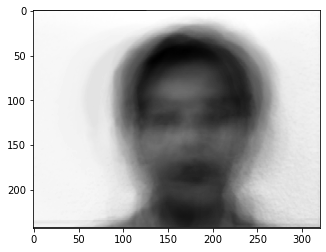

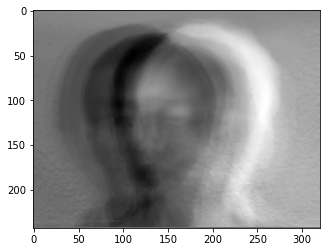

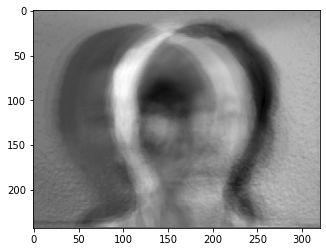

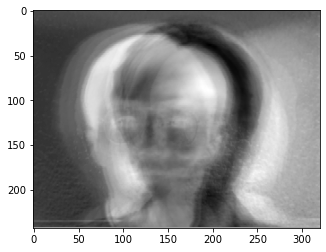

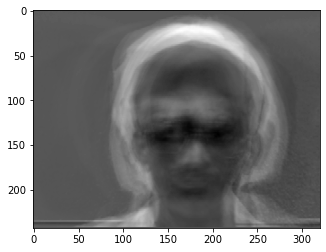

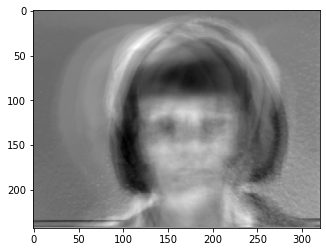

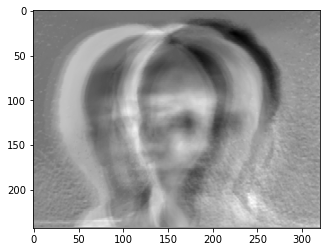

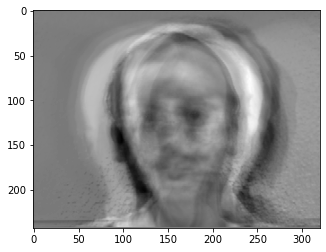

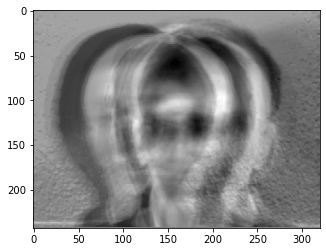

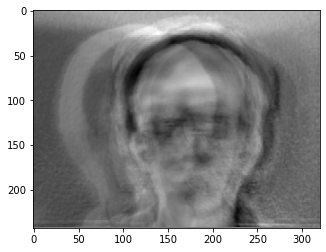

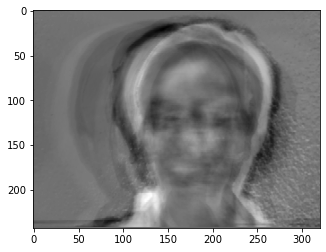

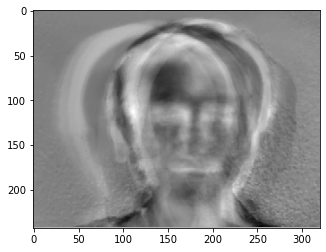

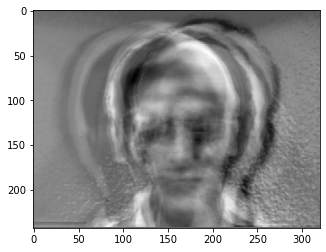

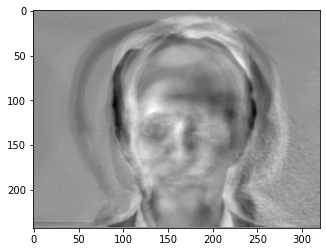

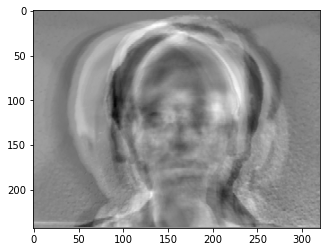

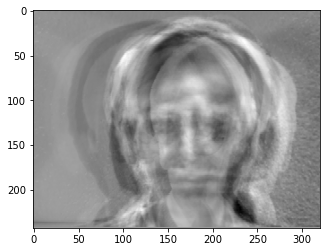

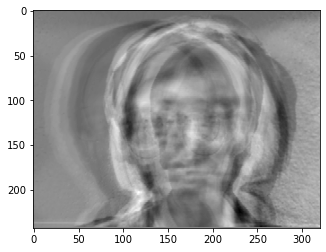

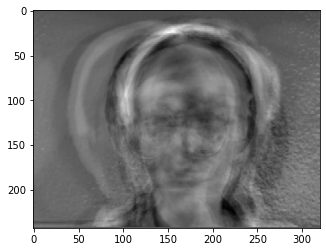

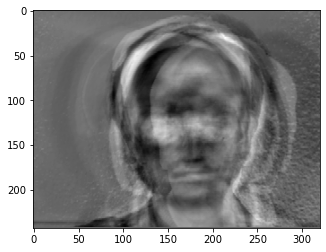

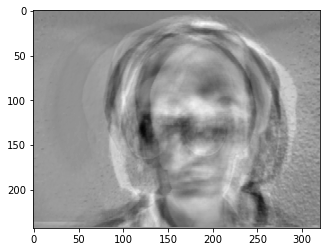

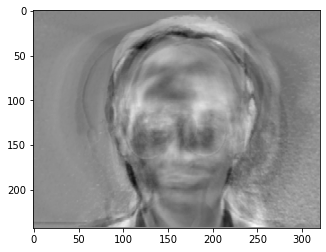

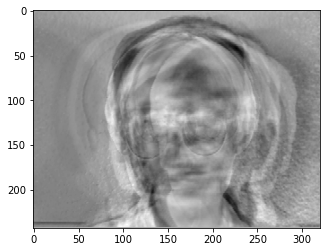

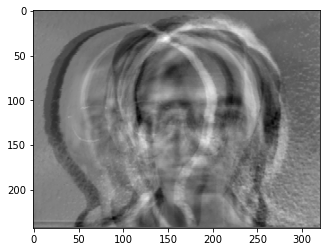

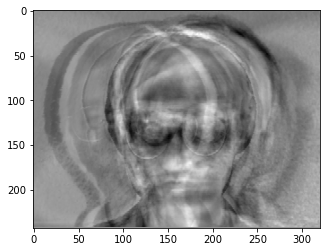

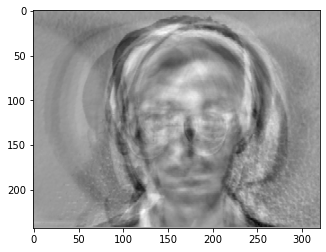

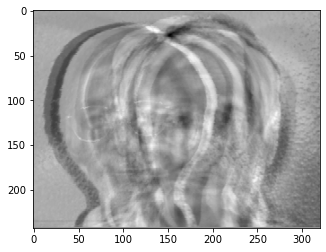

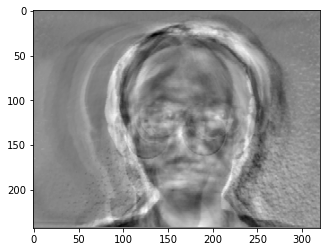

IndexError: list index out of range

In [10]:
for i in range(28):
    comp_vec = principal_eig_vec[i]
    comp_img = comp_vec.reshape(243,320)
    comp_img = comp_img.astype(float)
    plt.imshow(comp_img,cmap="gray")
    plt.show()

**7. Draw the Scree Plot**

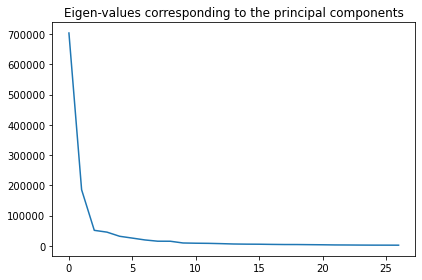

In [11]:
fig, ax = plt.subplots()

ax.plot(principal_eig_val)
ax.set_title("Eigen-values corresponding to the principal components")

plt.tight_layout()

**8. Obtain the feature vectors**

In [13]:
test_files = os.listdir(test_folder_path)
feat_vec_ls = []
for file in test_files:
    img_file = os.path.join(test_folder_path,file)
    test_img = mpimg.imread(img_file)
    test_img = test_img.reshape(arr.shape[0]*arr.shape[1],1)
    test_img = test_img - mean_img.T
    feat_vec = np.linalg.pinv(Q_hat.T)@test_img
    feat_vec_ls.append(np.ravel(feat_vec))
print(feat_vec_ls)

[array([-2.19144723e+03+0.j, -5.23277053e+03+0.j,  6.32369424e+02+0.j,
        2.21500785e+03+0.j, -2.15140185e+03+0.j, -1.33487441e+02+0.j,
        2.84366669e+00+0.j, -1.56896370e+03+0.j, -1.07497437e+03+0.j,
       -2.05594888e+02+0.j, -5.13874739e+02+0.j, -1.49962113e+03+0.j,
        1.22772540e+02+0.j,  1.14783046e+02+0.j,  5.86578688e+01+0.j,
       -7.85148151e+02+0.j, -1.35926249e+02+0.j,  1.66315276e+01+0.j,
       -9.87291701e+01+0.j, -4.38291719e+02+0.j,  1.65778827e+02+0.j,
       -9.53430989e+01+0.j,  1.47823091e+02+0.j, -2.01256321e+02+0.j,
       -3.47498896e+01+0.j,  3.48471450e+01+0.j, -2.57928012e+02+0.j]), array([ 3.71610951e+03+0.j, -1.57003629e+04+0.j,  2.47026986e+03+0.j,
        2.17143685e+03+0.j, -8.51563560e+02+0.j, -1.35032747e+03+0.j,
        8.05701039e+02+0.j, -4.19585142e+02+0.j, -5.66767345e+02+0.j,
        2.02619147e+01+0.j,  3.83496442e+01+0.j, -6.37321682e+02+0.j,
        2.97525549e+02+0.j, -3.82239374e+02+0.j, -2.19869572e+02+0.j,
        3.4255929

**9. Obtain the stem plot for the feature vectors**

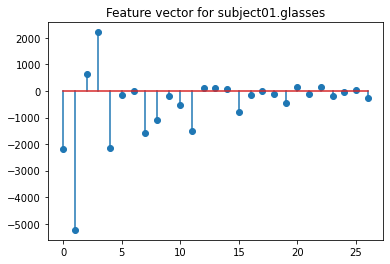

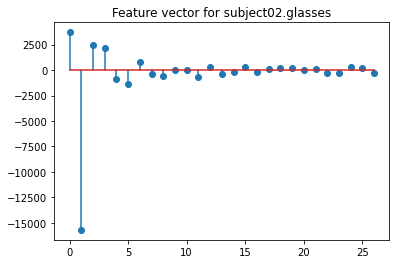

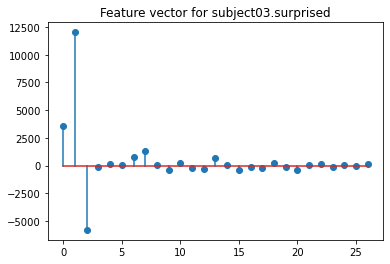

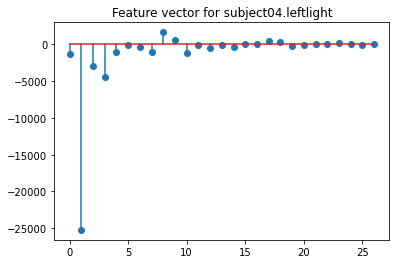

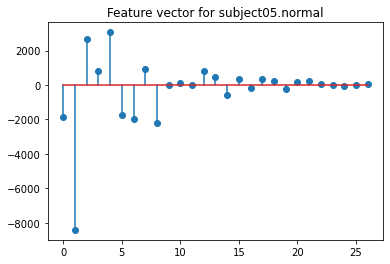

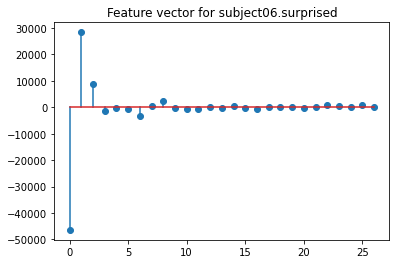

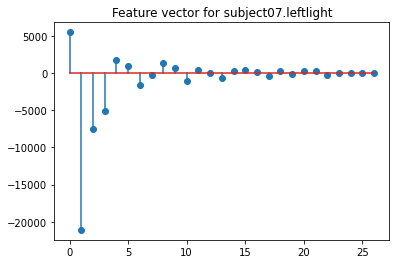

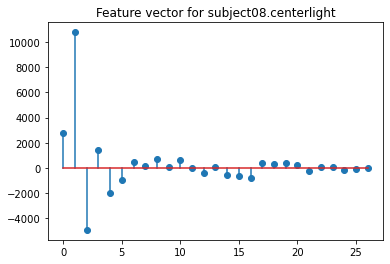

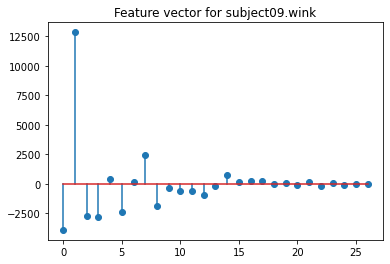

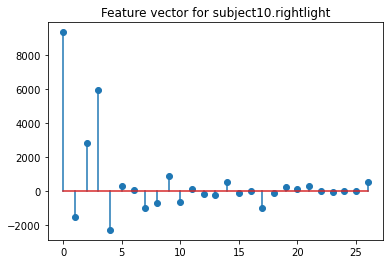

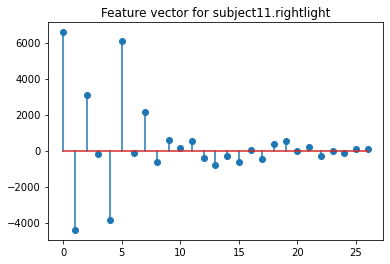

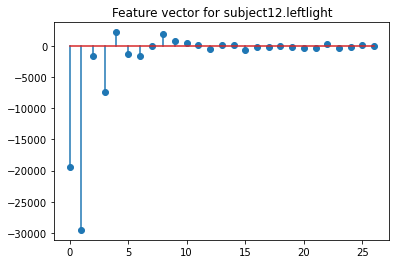

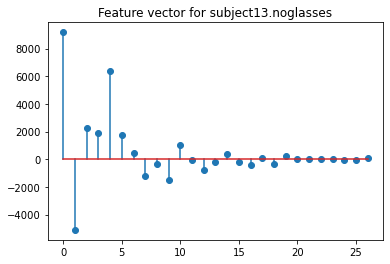

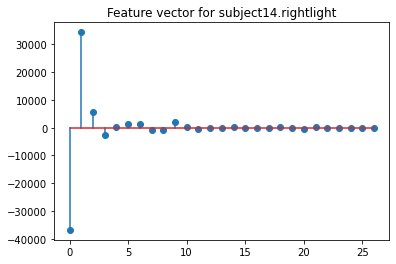

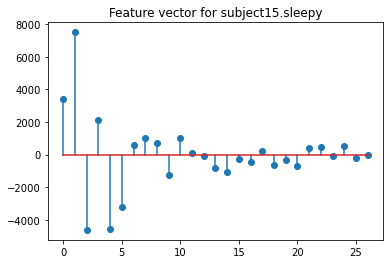

In [14]:
for i in range(len(feat_vec_ls)):
    plt.stem(feat_vec_ls[i])
    plt.title("Feature vector for "+test_files[i])
    plt.show()